In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import expon, kstest, rv_discrete

from src.code.models.galton_watson import GaltonWatson

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [2]:
poisson_1 = stats.poisson(1)

In [3]:
poisson_1.mean()

1.0

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 7 époques.


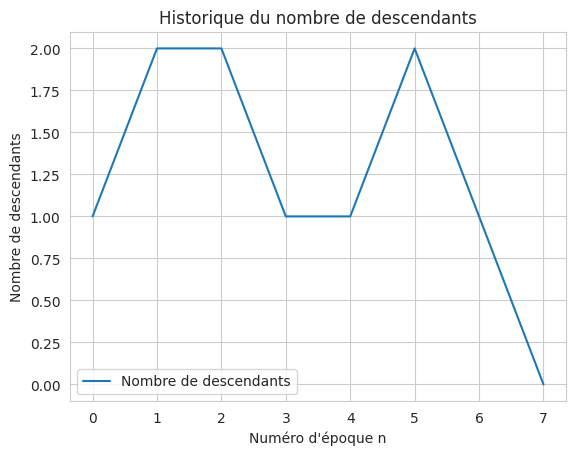

In [7]:
gp1.plot_historique_descendants()

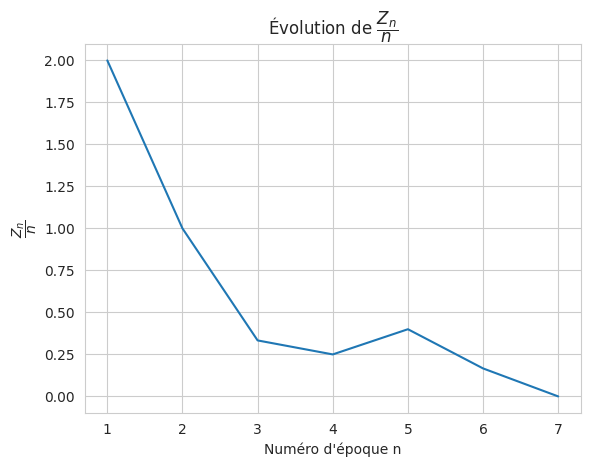

In [8]:
gp1.plot_zn_sur_n()

(array([2., 2., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

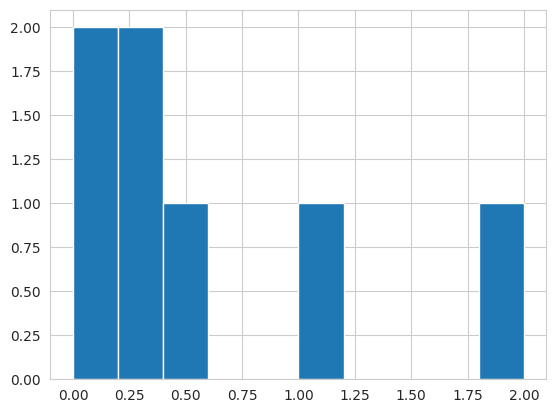

In [9]:
plt.hist(gp1.get_zn_sur_n())

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 1063528 survivants au bout de 7 époques.


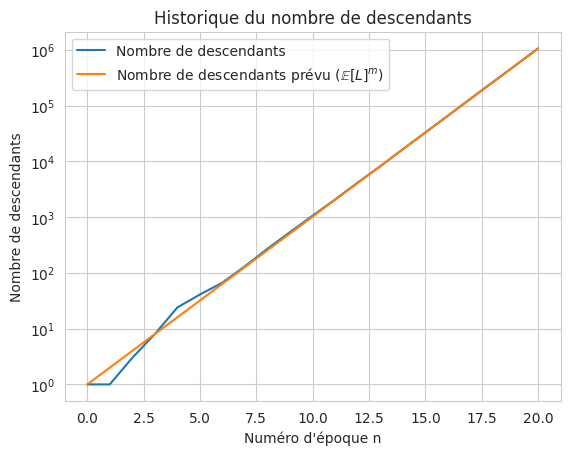

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

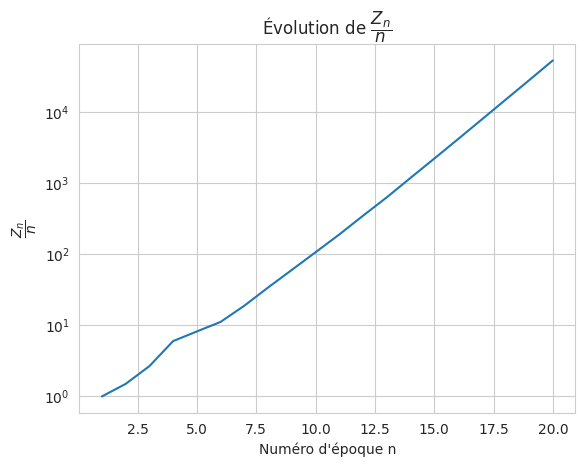

In [15]:
gp2.plot_zn_sur_n(logscale=True)

(array([16.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 5.318540e+03, 1.063608e+04, 1.595362e+04,
        2.127116e+04, 2.658870e+04, 3.190624e+04, 3.722378e+04,
        4.254132e+04, 4.785886e+04, 5.317640e+04]),
 <BarContainer object of 10 artists>)

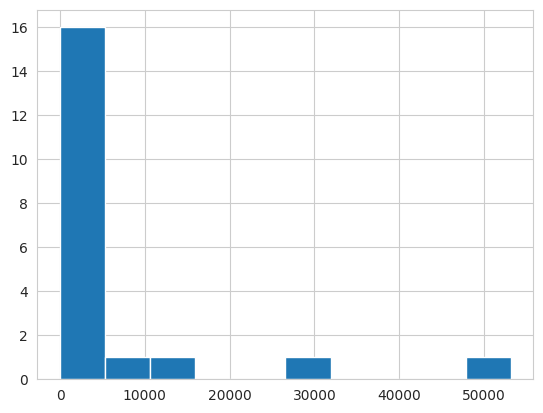

In [16]:
plt.hist(gp2.get_zn_sur_n())

## Essais $Z_n / n$

In [102]:
simu = []

nb_simulations = 10_000
nb_epoques = 100

for i in range(nb_simulations):
    gp1.reset()
    resultat = gp1.simule(nb_epoques)
    simu.append(resultat)

In [103]:
simu_poisson1 = np.array(simu)

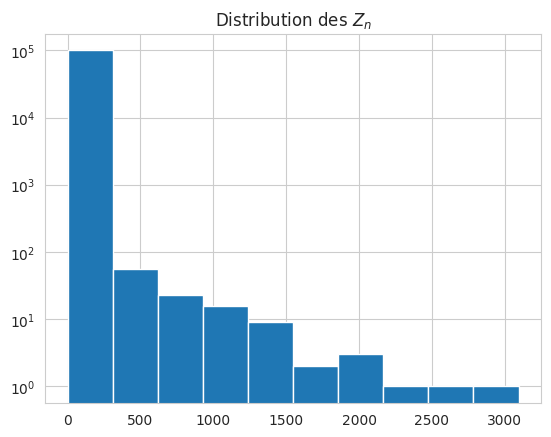

In [122]:
plt.title("Distribution des $Z_n$")
plt.hist(simu_poisson1)
plt.yscale("log")

In [105]:
np.sum(simu_poisson1 > 0)

202

In [107]:
zn_sup_zero = simu_poisson1[simu_poisson1 > 0]

(array([90., 57., 22., 16.,  9.,  2.,  3.,  1.,  1.,  1.]),
 array([1.0000e+00, 3.1040e+02, 6.1980e+02, 9.2920e+02, 1.2386e+03,
        1.5480e+03, 1.8574e+03, 2.1668e+03, 2.4762e+03, 2.7856e+03,
        3.0950e+03]),
 <BarContainer object of 10 artists>)

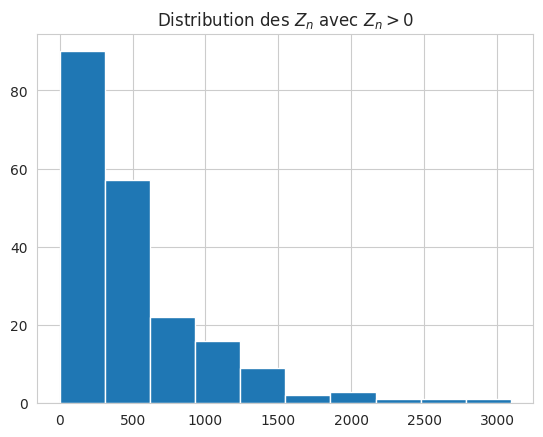

In [124]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [109]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.9468190711167226


In [111]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [112]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

(array([95., 50., 24., 13., 10.,  9.,  0.,  0.,  0.,  1.]),
 array([4.30894847e-04, 3.01906678e-01, 6.03382460e-01, 9.04858243e-01,
        1.20633403e+00, 1.50780981e+00, 1.80928559e+00, 2.11076137e+00,
        2.41223716e+00, 2.71371294e+00, 3.01518872e+00]),
 <BarContainer object of 10 artists>)

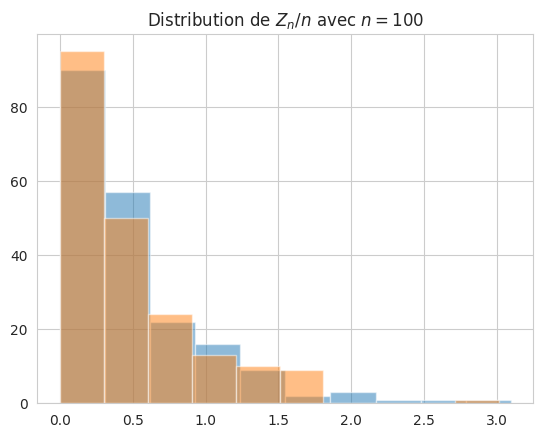

In [118]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
plt.hist(zn_sup_zero / nb_epoques, alpha=0.5)
plt.hist(echantillon_expo, alpha=0.5)

<Axes: title={'center': 'Distribution de $Z_{n} / n$ avec $n = 100$'}, ylabel='Probability'>

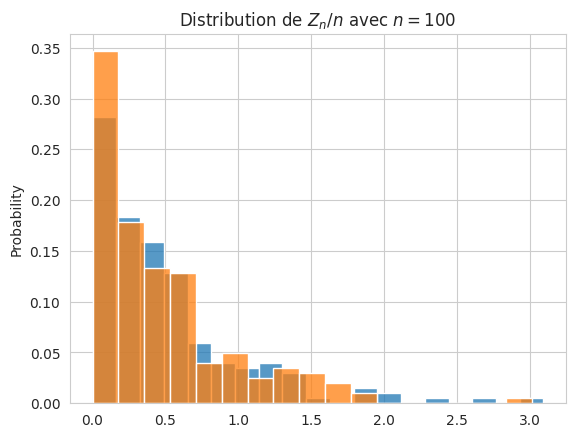

In [119]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability")
sns.histplot(echantillon_expo, stat="probability")

In [115]:
# Exemple de données
donnees = zn_sup_zero / nb_epoques

# Paramètre lambda estimé (par exemple, à partir de la méthode du maximum de vraisemblance)
lambda_estime = 1.0 / np.mean(donnees)
print(f"{lambda_estime = }")

# Effectuer le test de Kolmogorov-Smirnov
statistique_ks, p_value = kstest(donnees, "expon", args=(0, 1 / lambda_estime))

# Afficher les résultats
print("Statistique KS:", statistique_ks)
print("P-value:", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Les données ne suivent pas une loi exponentielle.")
else:
    print("Les données suivent une loi exponentielle.")

lambda_estime = 1.9468190711167226
Statistique KS: 0.043542816866810025
P-value: 0.8220961119584229
Les données suivent une loi exponentielle.


## Arbre de Galton-Watson

In [126]:
gp1.liste_descendants

[array([2]),
 array([3, 0]),
 array([4, 2, 1]),
 array([1, 0, 0, 2, 0, 0, 0]),
 array([2, 2, 0]),
 array([2, 0, 1, 0]),
 array([0, 1, 1]),
 array([0, 0])]

In [127]:
arbre = [
    [], # Z0
    [0], # Z1,0
    [0], # Z1,1
    [1],
    [1],
    [1],
    [3],
    [3],
    [3],
    [3],
]

In [176]:
ar = []

In [177]:
numero = 0
for generation in gp1.liste_descendants:
    
    for nb_descendants in generation:
        print(f"{nb_descendants = }")
        for _ in range(nb_descendants):
            ar.append([numero])

        numero += 1
    print("---------------------")

nb_descendants = 2
---------------------
nb_descendants = 3
nb_descendants = 0
---------------------
nb_descendants = 4
nb_descendants = 2
nb_descendants = 1
---------------------
nb_descendants = 1
nb_descendants = 0
nb_descendants = 0
nb_descendants = 2
nb_descendants = 0
nb_descendants = 0
nb_descendants = 0
---------------------
nb_descendants = 2
nb_descendants = 2
nb_descendants = 0
---------------------
nb_descendants = 2
nb_descendants = 0
nb_descendants = 1
nb_descendants = 0
---------------------
nb_descendants = 0
nb_descendants = 1
nb_descendants = 1
---------------------
nb_descendants = 0
nb_descendants = 0
---------------------


In [178]:
ar

[[0],
 [0],
 [1],
 [1],
 [1],
 [3],
 [3],
 [3],
 [3],
 [4],
 [4],
 [5],
 [6],
 [9],
 [9],
 [13],
 [13],
 [14],
 [14],
 [16],
 [16],
 [18],
 [21],
 [22]]

In [200]:
edge_list = []

In [201]:
for i in range(len(ar)):
    edge_list.append((ar[i][0], i + 1))

In [202]:
edge_list

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 10),
 (4, 11),
 (5, 12),
 (6, 13),
 (9, 14),
 (9, 15),
 (13, 16),
 (13, 17),
 (14, 18),
 (14, 19),
 (16, 20),
 (16, 21),
 (18, 22),
 (21, 23),
 (22, 24)]

In [203]:
import networkx as nx

In [204]:
e = nx.DiGraph(edge_list)

In [205]:
nx.is_tree(e)

True

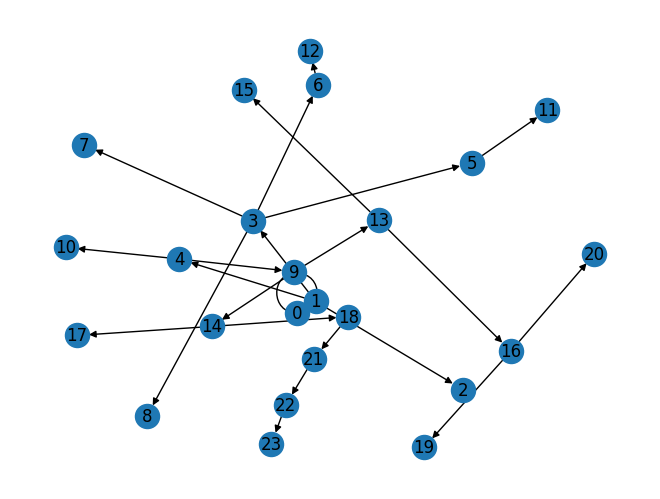

In [206]:
G = nx.DiGraph()
for enfant, parent in enumerate(ar):
    G.add_edge(parent[0], enfant)

# Dessin du graphe
pos = nx.spring_layout(G)  # Vous pouvez utiliser d'autres méthodes de placement si nécessaire
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

In [209]:
import networkx as nx
import random


def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                     vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                     pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

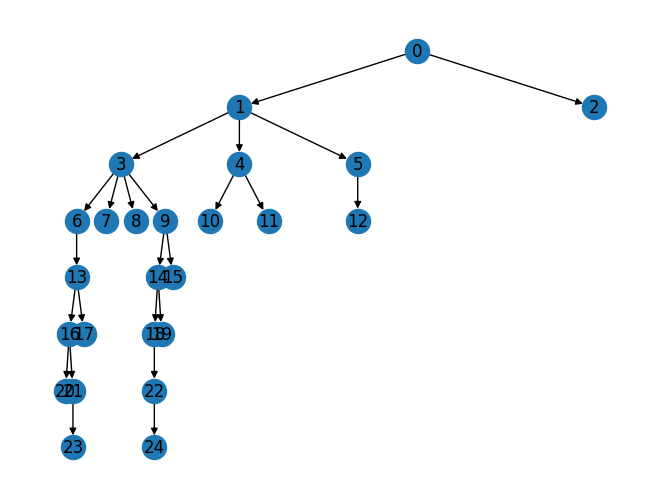

In [224]:
pos = hierarchy_pos(e)
nx.draw(e, pos=pos, with_labels=True)

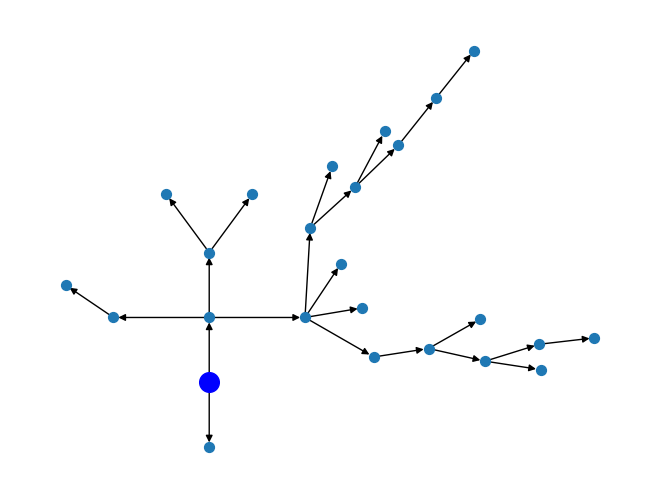

In [225]:
import math

pos = hierarchy_pos(e, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(e, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)

In [226]:
def hierarchy_pos2(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, leaf_vs_root_factor = 0.5):

    '''
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    Based on Joel's answer at https://stackoverflow.com/a/29597209/2966723,
    but with some modifications.  

    We include this because it may be useful for plotting transmission trees,
    and there is currently no networkx equivalent (though it may be coming soon).
    
    There are two basic approaches we think of to allocate the horizontal 
    location of a node.  
    
    - Top down: we allocate horizontal space to a node.  Then its ``k`` 
      descendants split up that horizontal space equally.  This tends to result
      in overlapping nodes when some have many descendants.
    - Bottom up: we allocate horizontal space to each leaf node.  A node at a 
      higher level gets the entire space allocated to its descendant leaves.
      Based on this, leaf nodes at higher levels get the same space as leaf
      nodes very deep in the tree.  
      
    We use use both of these approaches simultaneously with ``leaf_vs_root_factor`` 
    determining how much of the horizontal space is based on the bottom up 
    or top down approaches.  ``0`` gives pure bottom up, while 1 gives pure top
    down.   
    
    
    :Arguments: 
    
    **G** the graph (must be a tree)

    **root** the root node of the tree 
    - if the tree is directed and this is not given, the root will be found and used
    - if the tree is directed and this is given, then the positions will be 
      just for the descendants of this node.
    - if the tree is undirected and not given, then a random choice will be used.

    **width** horizontal space allocated for this branch - avoids overlap with other branches

    **vert_gap** gap between levels of hierarchy

    **vert_loc** vertical location of root
    
    **leaf_vs_root_factor**

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, leftmost, width, leafdx = 0.2, vert_gap = 0.2, vert_loc = 0,
                       xcenter = 0.5, rootpos = None,
                       leafpos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if rootpos is None:
            rootpos = {root:(xcenter,vert_loc)}
        else:
            rootpos[root] = (xcenter, vert_loc)
        if leafpos is None:
            leafpos = {}
        children = list(G.neighbors(root))
        leaf_count = 0
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            rootdx = width/len(children)
            nextx = xcenter - width/2 - rootdx/2
            for child in children:
                nextx += rootdx
                rootpos, leafpos, newleaves = _hierarchy_pos(G,child, leftmost+leaf_count*leafdx,
                                                             width=rootdx, leafdx=leafdx,
                                                             vert_gap = vert_gap, vert_loc = vert_loc-vert_gap,
                                                             xcenter=nextx, rootpos=rootpos, leafpos=leafpos, parent = root)
                leaf_count += newleaves

            leftmostchild = min((x for x,y in [leafpos[child] for child in children]))
            rightmostchild = max((x for x,y in [leafpos[child] for child in children]))
            leafpos[root] = ((leftmostchild+rightmostchild)/2, vert_loc)
        else:
            leaf_count = 1
            leafpos[root]  = (leftmost, vert_loc)
        #        pos[root] = (leftmost + (leaf_count-1)*dx/2., vert_loc)
        #        print(leaf_count)
        return rootpos, leafpos, leaf_count

    xcenter = width/2.
    if isinstance(G, nx.DiGraph):
        leafcount = len([node for node in nx.descendants(G, root) if G.out_degree(node)==0])
    elif isinstance(G, nx.Graph):
        leafcount = len([node for node in nx.node_connected_component(G, root) if G.degree(node)==1 and node != root])
    rootpos, leafpos, leaf_count = _hierarchy_pos(G, root, 0, width,
                                                  leafdx=width*1./leafcount,
                                                  vert_gap=vert_gap,
                                                  vert_loc = vert_loc,
                                                  xcenter = xcenter)
    pos = {}
    for node in rootpos:
        pos[node] = (leaf_vs_root_factor*leafpos[node][0] + (1-leaf_vs_root_factor)*rootpos[node][0], leafpos[node][1])
    #    pos = {node:(leaf_vs_root_factor*x1+(1-leaf_vs_root_factor)*x2, y1) for ((x1,y1), (x2,y2)) in (leafpos[node], rootpos[node]) for node in rootpos}
    xmax = max(x for x,y in pos.values())
    for node in pos:
        pos[node]= (pos[node][0]*width/xmax, pos[node][1])
    return pos

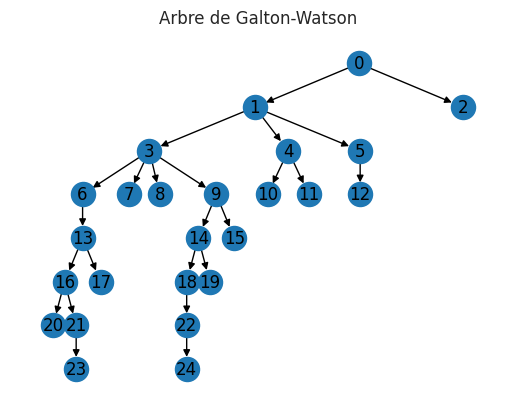

In [230]:
plt.title("Arbre de Galton-Watson")
pos = hierarchy_pos2(e)
nx.draw(e, pos=pos, with_labels=True)

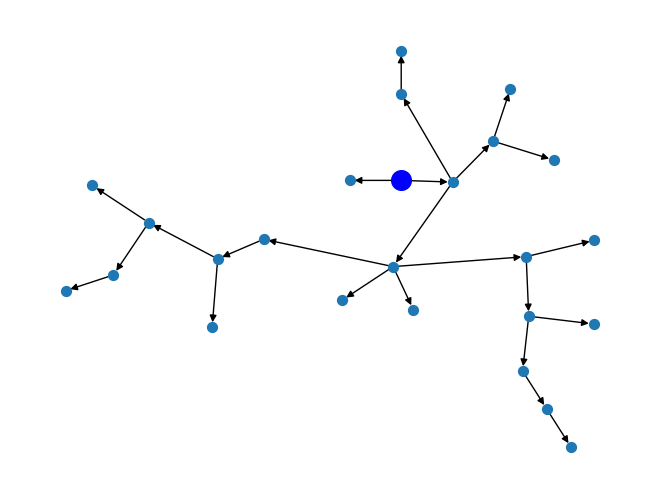

In [228]:
pos = hierarchy_pos2(e, 0, width = 2*math.pi)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(e, pos=new_pos, node_size = 50)
nx.draw_networkx_nodes(G, pos=new_pos, nodelist = [0], node_color = 'blue', node_size = 200)